## 第一題

In [28]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

alphas = range(0, 101)

# 分別儲存 R square
r_squares_lasso = []
r_squares_ridge = []

# 讀取dataset
boston = load_boston()
# feature
x = boston.data
# label/ target value
y = boston.target

# 切割測試集與訓練集, 典型的37比
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 從0跑到100
for alpha in alphas:
  # 建立模型時代入alpha值
  lasso = Lasso(alpha=alpha)
  # 訓練模型
  lasso.fit(x_train, y_train)
  # 預測
  y_pred = lasso.predict(x_test)
  # 計算loss
  score = r2_score(y_test, y_pred)
  r_squares_lasso.append(score)
  
  # 換ridge模型再做一次
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  y_pred = ridge.predict(x_test)
  score = r2_score(y_test, y_pred)
  r_squares_ridge.append(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 作圖

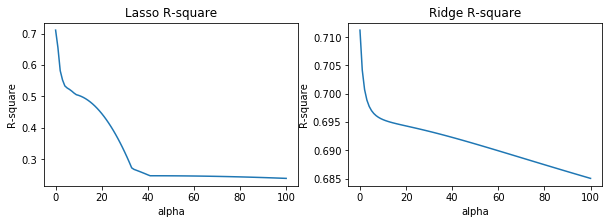

In [29]:
# 建立圖像物件
plt.figure(figsize=(10,3))

# 第一張圖
plt.subplot(1,2,1)
plt.plot(alphas, r_squares_lasso)
plt.title('Lasso R-square')
# x軸是alpha, y軸是r_square
plt.xlabel('alpha')
plt.ylabel('R-square')

# 第二張圖
plt.subplot(1,2,2)
plt.plot(alphas, r_squares_ridge)
plt.title('Ridge R-square')
# x軸是alpha, y軸是r_square
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.show()

## 第二題

In [30]:
from sklearn.linear_model import ElasticNet

hybrid = ElasticNet(l1_ratio=0.7)
hybrid.fit(x_train, y_train)
y_pred = hybrid.predict(x_test)
r2_score(y_test, y_pred)

0.6575227404082377